In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import sklearn.neural_network as nn
import sklearn.metrics as mt
import joblib
import pickle

In [31]:
def plot_confusion_matrix(c_matrix): 
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()

In [13]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

X, y = mnist.data, mnist.target

print('Got MNIST with %d training- and %d test samples' % (len(X), len(y_test)))

# rescale the data, train/test split
X = X / 255.
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

Got MNIST with 70000 training- and 10000 test samples


In [14]:
classifier = nn.MLPClassifier()
classifier.fit(X_train, y_train)

MLPClassifier()

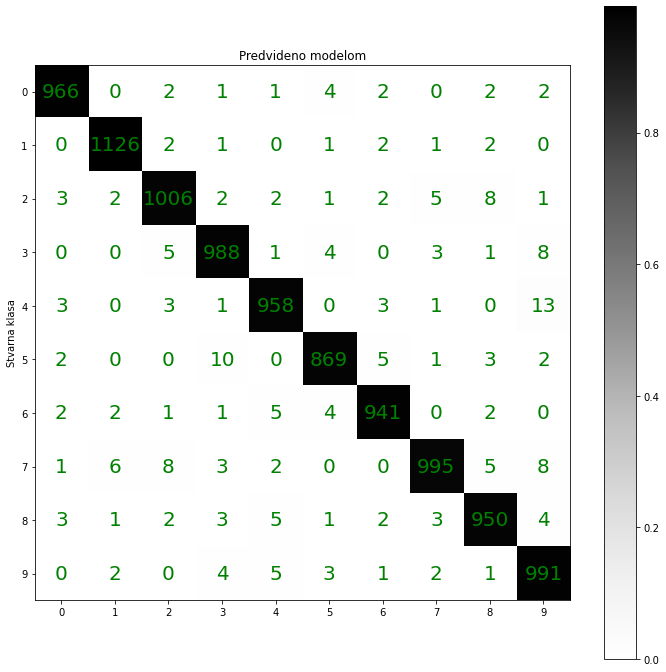

Accuracy = 0.979
Missclacification rate = 0.02100000000000002
Precision = 0.9789423426969182
Recall = 0.9788257549623121


In [32]:
prediction = classifier.predict(X_test)
conf_matrix = mt.confusion_matrix(y_test, prediction)
plot_confusion_matrix(conf_matrix)
accuracy = mt.accuracy_score(y_test, prediction)
missclasification = 1-accuracy
precision = mt.precision_score(y_test, prediction, average='macro')
recall = mt.recall_score(y_test, prediction, average='macro')
print("Accuracy = {}".format(accuracy))
print("Missclacification rate = {}".format(missclasification))
print("Precision = {}".format(precision))
print("Recall = {}".format(recall))

In [33]:
# save NN to disk
filename = "NN_model.sav"
joblib.dump(classifier, filename)

['NN_model.sav']